In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [60]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read and explore the given dataset

In [61]:
df = pd.read_csv('ratings_Electronics.csv')

In [62]:
df.head(10)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [63]:
df.columns

Index(['AKM1MP6P0OYPR', '0132793040', '5.0', '1365811200'], dtype='object')

In [64]:
df.shape

(7824481, 4)

# The Size of the Dataset is 7824481

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
AKM1MP6P0OYPR    object
0132793040       object
5.0              float64
1365811200       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


# Checking the Dataset for any NA/Null Values

In [66]:
df.isna().sum()

AKM1MP6P0OYPR    0
0132793040       0
5.0              0
1365811200       0
dtype: int64

In [67]:
df.isnull().sum()

AKM1MP6P0OYPR    0
0132793040       0
5.0              0
1365811200       0
dtype: int64

# Rename column/add headers, plot histograms & find data characteristics

In [68]:
df.columns = ['userid','productid','ratings','timestamp']

In [69]:
df.head(5)

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


# We will drop the timestamp column as it is not needed

In [70]:
df = df.drop('timestamp',axis = 1)

In [71]:
df.head()

,userid,productid,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


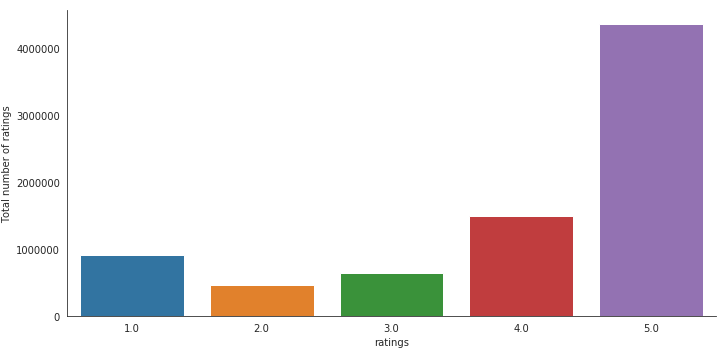

In [72]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

# Take a subset of the dataset to make it less sparse/ denser. Keeping only those observations where users have given 50 or more number of ratings.

# Count of Unique Users

In [73]:
len(df["userid"].unique())

4201696

# Total number of Unique products

In [74]:

len(df["productid"].unique())

476001

# Setting the Rating Limit to 50

In [75]:
rating_limit = 50

In [76]:
user_50 = df['userid'].value_counts()

In [77]:
df = df[df['userid'].isin(user_50[user_50 >= rating_limit].index)]

In [78]:
df.shape

(125871, 3)

In [79]:
# Users with max no of products reviewed
df['userid'].value_counts().head(10)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: userid, dtype: int64

# After selecting only users who have given 50 or more ratings the data set reduced from 7824481 rows to 125871

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 93 to 7824443
Data columns (total 3 columns):
userid       125871 non-null object
productid    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


# Total unique users after above changes

In [81]:
len(df["userid"].unique())

1540

# Total unique products after above changes

In [82]:
len(df["productid"].unique())

48190

In [83]:
df.userid = df.userid.astype(str)

In [84]:
df.productid = df.productid.astype(str)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 93 to 7824443
Data columns (total 3 columns):
userid       125871 non-null object
productid    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


# Checking the distribution of ratings below

Text(0.5, 1.0, 'Ratings Distribution\n')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

<function matplotlib.pyplot.show(*args, **kw)>

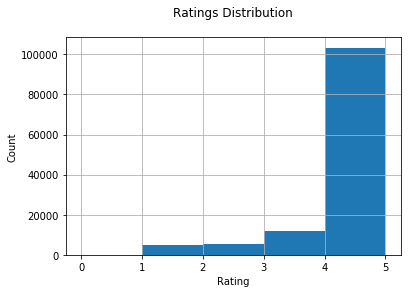

In [86]:
#Checking Ratings distribution
df.ratings.hist(bins=[0,1,2,3,4,5])
plt.title('Ratings Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show

In [87]:
purchase_ids = ['userid', 'productid']

# Get a dataframe consisting only of reviews that are duplicated
duplicates = df[df.duplicated(subset=purchase_ids,
                                        keep=False)].sort_values(purchase_ids)
duplicates.head(4)

,userid,productid,ratings


# No duplicates found, where user has posted more than 1 review on the same product

In [88]:
(df.userid.value_counts().reset_index(
    name='frequency').frequency.value_counts(
        normalize=False).rename_axis('reviews').to_frame().head(10))

,frequency
reviews,
50,74
52,63
57,58
51,57
53,55
55,50
56,50
54,48
59,47


# 80k people have reviewed at least 2 products, and hence, we should be able to build a decent foundational model

# Splitting the data randomly into train and test dataset below

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
train_data, test_data = train_test_split(df, test_size = 0.30, random_state=0)

# Building Popularity Recommender model below

In [91]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():    
    def __init__(self):
        self.train_data = None
        self.userid = None        
        self.productid = None        
        self.popularity_recommendations = None            
    #Create the popularity based recommender system model    
    def create(self, train_data, userid, productid):
        self.train_data = train_data
        self.userid = userid        
        self.productid = productid         
        
        #Get a count of user_ids for recommendation score
        train_data_grouped = train_data.groupby([self.productid]).agg({self.userid: 'count'}).reset_index()        
        train_data_grouped.rename(columns = {'userid': 'score'},inplace=True)            
        #Sort the products based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.productid], ascending = [0,1])            
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)     
        #Use the popularity based recommender system model to    
        #make recommendations    
    def recommend(self, userid):            
        user_recommendations = self.popularity_recommendations                 
        #Add user_id column for which the recommendations are being generated        
        user_recommendations['userid'] = userid            
        #Bring user_id column to the front        
        cols = user_recommendations.columns.tolist()        
        cols = cols[-1:] + cols[:-1]        
        user_recommendations = user_recommendations[cols]
        return user_recommendations

In [92]:
pm = popularity_recommender_py()

In [93]:
train_data.shape

(88109, 3)

In [94]:
test_data.shape

(37762, 3)

In [95]:
users = df['userid'].unique()
len(users) ## unique users

1540

In [96]:
products = df['productid'].unique()
len(products) ## unique products

48190

In [97]:
pm.create(train_data, 'userid', 'productid')

# Getting top 10 reommendations for popularity based model

In [98]:
user_id = users[5]

In [99]:
pm.recommend(user_id)

,userid,productid,score,Rank
30847,A3TAS1AG6FMBQW,B0088CJT4U,133,1.0
30287,A3TAS1AG6FMBQW,B007WTAJTO,124,2.0
19647,A3TAS1AG6FMBQW,B003ES5ZUU,122,3.0
8752,A3TAS1AG6FMBQW,B000N99BBC,114,4.0
30555,A3TAS1AG6FMBQW,B00829THK0,97,5.0
30559,A3TAS1AG6FMBQW,B00829TIEK,97,6.0
17384,A3TAS1AG6FMBQW,B002R5AM7C,94,7.0
31107,A3TAS1AG6FMBQW,B008DWCRQW,91,8.0
17573,A3TAS1AG6FMBQW,B002SZEOLG,84,9.0
22744,A3TAS1AG6FMBQW,B004CLYEDC,82,10.0


In [100]:
train_data_groupby_pi = train_data.groupby('productid').mean().reset_index()

In [101]:
train_data_sorted = train_data_groupby_pi.sort_values(['ratings', 'productid'], ascending = [0,1])

In [102]:
df_pred = test_data[['userid', 'productid', 'ratings']]
df_pred.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)
df_pred = df_pred.merge(train_data_sorted,left_on='productid', right_on = 'productid')
df_pred.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

# Evaluating model by computing RMSE 

In [103]:
import sklearn.metrics as metrics
from math import sqrt

In [104]:
MSE = metrics.mean_squared_error(df_pred['true_ratings'], df_pred['predicted_ratings'])

In [105]:
print("Mean Squared error:", MSE)
print("Root Mean Squared error:", sqrt(MSE))

Mean Squared error: 1.1928167047821236
Root Mean Squared error: 1.092161482923713


# Building Collaborative Filtering model below

In [106]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [107]:
Ratings = Reader(rating_scale=(0.5, 5))

In [108]:
data = Dataset.load_from_df(df[['userid', 'productid', 'ratings']], Ratings)

In [109]:
traindata, testdata = train_test_split(data, test_size=0.3,random_state=42)

In [110]:
SVDModel = SVD(n_factors = 50, reg_all = 0.01, lr_all = 0.001)

In [111]:
SVDModel.fit(traindata)

In [112]:
test_pred = SVDModel.test(testdata)

In [113]:
accuracy.rmse(test_pred)

RMSE: 1.0019


1.0018878147841026

# Optimizing the model by finding the best hyper parameters using Grid Search CV

In [114]:
from surprise.model_selection import GridSearchCV

In [115]:
param_grid = {'n_factors' : [5,10,15],'lr_all': [0.001, 0.003, 0.005, 0.007,0.009],'reg_all': [0.01, 0.02,0.03]}

In [116]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [117]:
gs.fit(data)

In [119]:
# get best parameters
print("Optimal parameters: ", gs.best_params)

# get best score
print("Optimal score: ", gs.best_score['rmse'])

Optimal parameters:  {'rmse': {'n_factors': 5, 'lr_all': 0.007, 'reg_all': 0.03}}
Optimal score:  0.9798959548421555


In [120]:
SVD_Model= SVD(n_factors = 5,reg_all = 0.03,lr_all = 0.007)

In [121]:
SVD_Model.fit(traindata)

In [122]:
new_SVD_test_pred =  SVD_Model.test(testdata)

In [123]:
accuracy.rmse(new_SVD_test_pred)

RMSE: 0.9839


0.9839271702371202

In [124]:
user_factors = SVD_Model.pu
item_factors = SVD_Model.qi

In [125]:
pred = np.dot(user_factors,np.transpose(item_factors))

In [126]:
SVD_pred = pd.DataFrame(new_SVD_test_pred)

In [127]:
SVD_pred.shape

(37762, 5)

In [128]:
SVD_pred.columns

Index(['uid', 'iid', 'r_ui', 'est', 'details'], dtype='object')

In [129]:
df_pred_new_sorted = SVD_pred.sort_values(by=['uid','est'],ascending=[True,False]).groupby('uid').head(5)

In [130]:
df_pred_new_sorted

,uid,iid,r_ui,est,details
25292,A100UD67AHFODS,B00108UNEY,5.0,4.835443,{'was_impossible': False}
10072,A100UD67AHFODS,B00746LVOM,4.0,4.758024,{'was_impossible': False}
12501,A100UD67AHFODS,B000OMKR8E,2.0,4.739241,{'was_impossible': False}
32077,A100UD67AHFODS,B009LL9VDG,5.0,4.709047,{'was_impossible': False}
444,A100UD67AHFODS,B00A83I8G2,5.0,4.704713,{'was_impossible': False}
35147,A100WO06OQR8BQ,B001AW8W7A,3.0,4.174552,{'was_impossible': False}
26547,A100WO06OQR8BQ,B00006HSYC,5.0,4.125172,{'was_impossible': False}
29362,A100WO06OQR8BQ,B001XURGTO,1.0,4.010972,{'was_impossible': False}
21396,A100WO06OQR8BQ,B0002R5Y5M,1.0,4.002446,{'was_impossible': False}
12627,A100WO06OQR8BQ,B003ANN0D8,5.0,3.939478,{'was_impossible': False}


# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [131]:
from collections import defaultdict

In [132]:
def get_top_n(predictions, n):    
    top_n = defaultdict(list) # First map the predictions to each user.
    for uid, iid, true_r, est, _ in predictions:
         top_n[uid].append((iid, est))  
            
    for uid, user_ratings in top_n.items(): # Then sort the predictions for each user and retrieve the k highest ones.
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

get_top_n(test_pred, 5)

defaultdict(list,
            {'A8CKH8XB33XGN': [('B001QUA6RA', 4.449529871843903),
              ('B006EKIQYM', 4.360586337777252),
              ('B000067RT6', 4.357146755400102),
              ('B004GW25WY', 4.305142109763121),
              ('B0044YPN0A', 4.286807768995044)],
             'AWNJAY0M5UI70': [('B0036WT4H4', 4.7681763212354085),
              ('B0054KPK9C', 4.703844579723675),
              ('B000E5BKQE', 4.625164191122529),
              ('B000Z80ICM', 4.610705302771046),
              ('B0017JY5FE', 4.592347080931688)],
             'AR18DH5SL9F73': [('B0041Q38NU', 4.262469530724335),
              ('B004EGI3CI', 4.249687534462835),
              ('B000WH6H1M', 4.235060581288239),
              ('B0019N4RUQ', 4.196050880133533),
              ('B004EI0EG4', 4.159933718273039)],
             'A1FXT4VNDA25LY': [('B000QUUFRW', 4.884380098264585),
              ('B0000BZL1P', 4.790318371258231),
              ('B00019JPRO', 4.48320107030656),
              ('B004MMEHH4',

# Insights below

# Collaborative filtering provides personalized recommendation for products leading to higher probablity of the user actually purchasing the product



# Popularity based model is based on rank ordering and is not personalized for a particular user, this may mean the user does not like the suggestions.



# If we have some user history the better model to use will be Collaborative filtering

# if we do not have any information about the user preferences we can go with the popularity based model